In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [17]:
filePath = '../Data/DeathRateAndCauses.csv'
deathRateData = pd.read_csv(filePath)
deathRateData.shape

(6840, 31)

In [18]:
deathRateData.head()

,Entity,Code,Year,Outdoor air pollution,High systolic blood pressure,Diet high in sodium,Diet low in whole grains,Alochol use,Diet low in fruits,Unsafe water source,...,High body mass index,Unsafe sanitation,No access to handwashing facility,Drug use,Low bone mineral density,Vitamin A deficiency,Child stunting,Discontinued breastfeeding,Non-exclusive breastfeeding,Iron deficiency
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812


Cleaning data, dorp 'Entity' with groups of countries

In [19]:
for i in deathRateData.Entity.unique():
    print(i)

Afghanistan
African Region (WHO)
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
East Asia & Pacific (WB)
East Timor
Eastern Mediterranean Region (WHO)
Ecuador
Egypt
El Salvador
England
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe & Central Asia (WB)
European Region (WHO)
Fiji
Finland
France
G20
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya


In [20]:
toDrop = ['G20',
    'African Region (WHO)',
    'East Asia & Pacific (WB)',
    'Eastern Mediterranean Region (WHO)',
    'Europe & Central Asia (WB)',
    'European Region (WHO)',
    'Latin America & Caribbean (WB)',
    'Middle East & North Africa (WB)',
    'North America (WB)', 'OECD Countries',
    'Region of the Americas (WHO)', 
    'South Asia (WB)', 
    'South-East Asia Region (WHO)',
    'Sub-Saharan Africa (WB)',
    'Western Pacific Region (WHO)',
    'World',
    'World Bank High Income',
    'World Bank Low Income',
    'World Bank Lower Middle Income',
    'World Bank Upper Middle Income']

deathRateData = deathRateData[~deathRateData['Entity'].isin(toDrop)]


Checking clean code

In [21]:
for i in deathRateData.Entity.unique():
    if(i in toDrop):
        print(i)

function to plot data

In [22]:
def plotData(toPlot, type):
    tmp = deathRateData.groupby('Entity')[toPlot].mean().reset_index()
    tmp = tmp.sort_values(by=toPlot, ascending=type)
    sns.barplot(y='Entity', x=toPlot, data=tmp.head(10))

Use a forloop to plot all relevant data

/tmp/ipykernel_3229/2863725435.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i * 100)


<Figure size 2000x500 with 0 Axes>

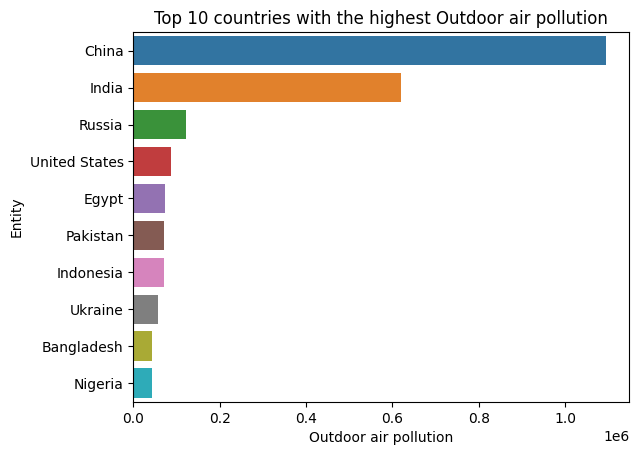

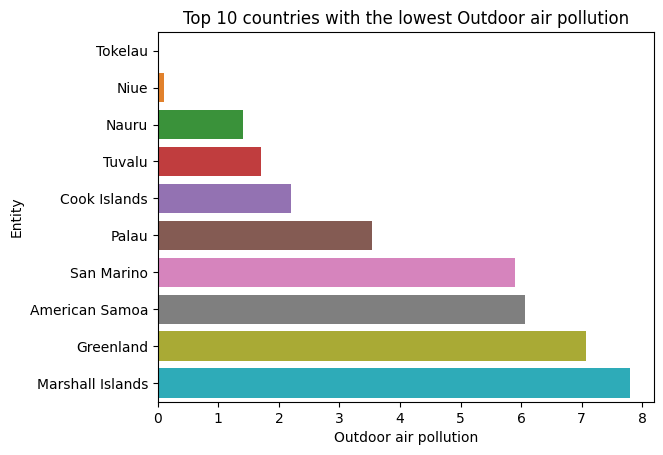

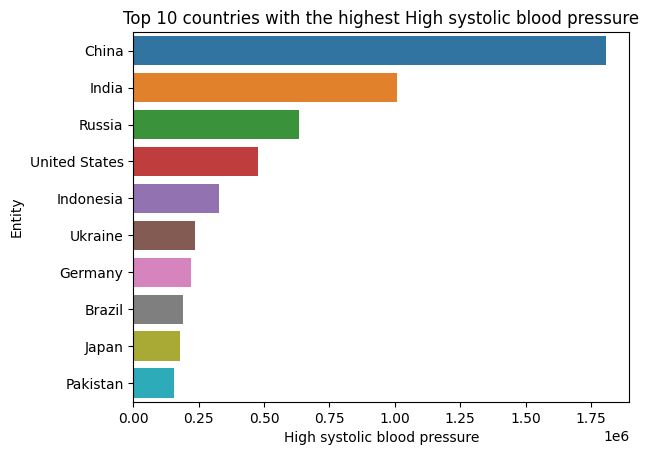

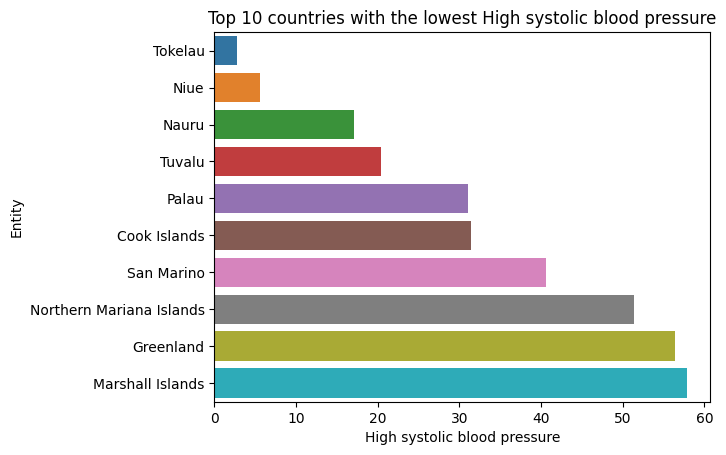

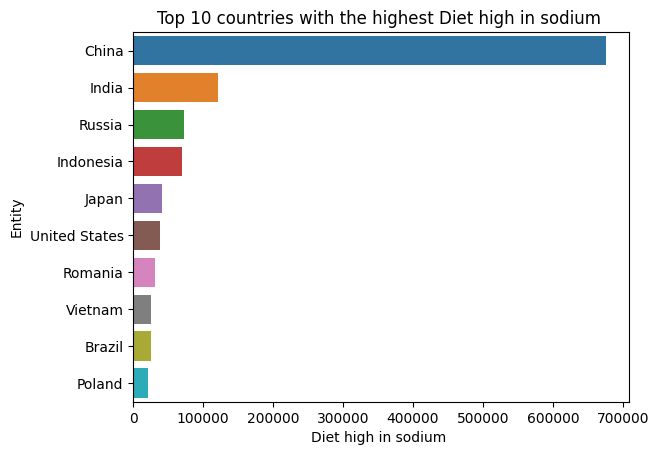

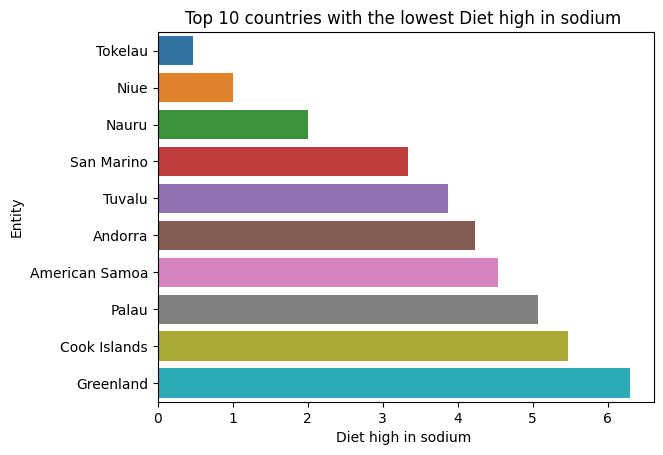

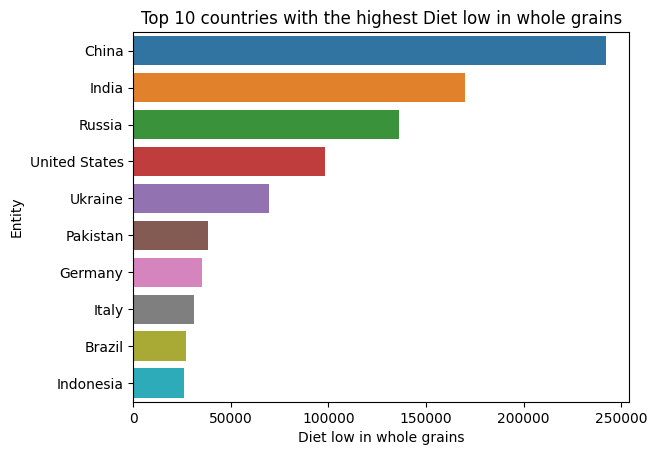

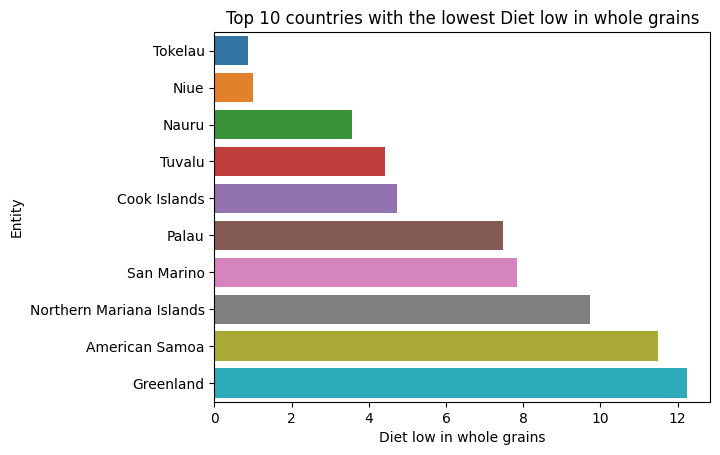

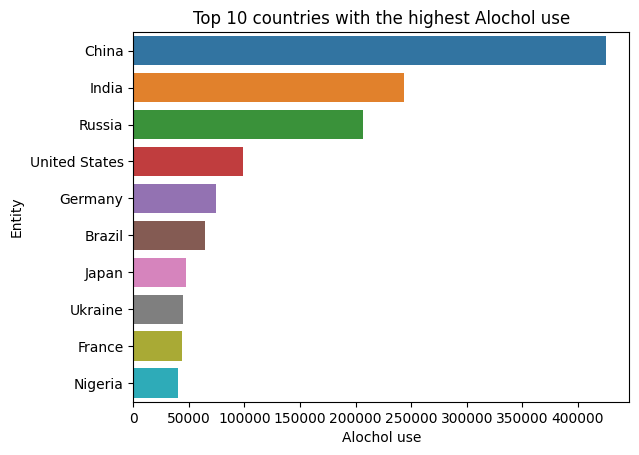

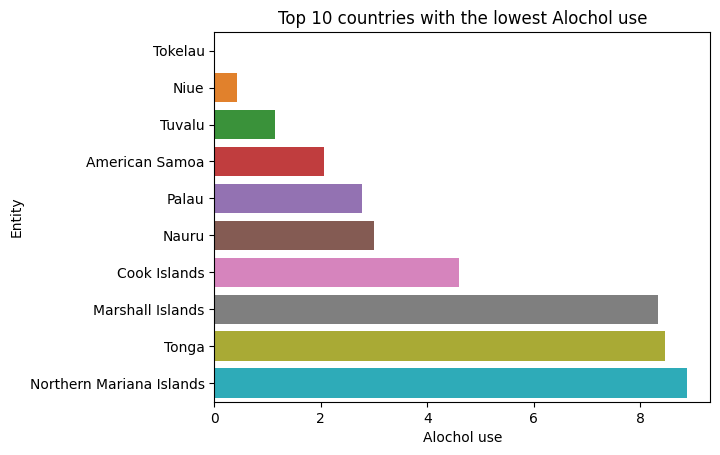

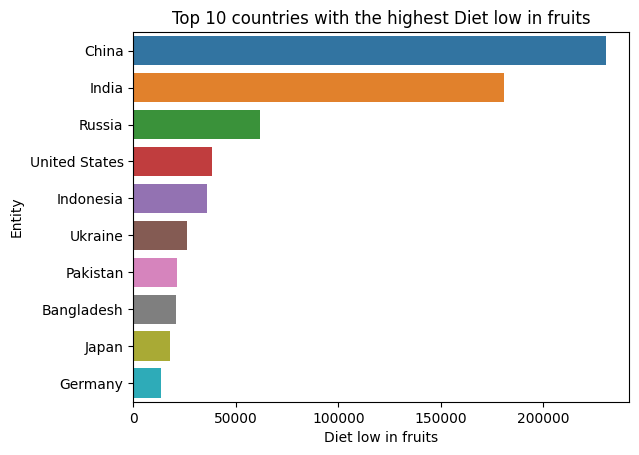

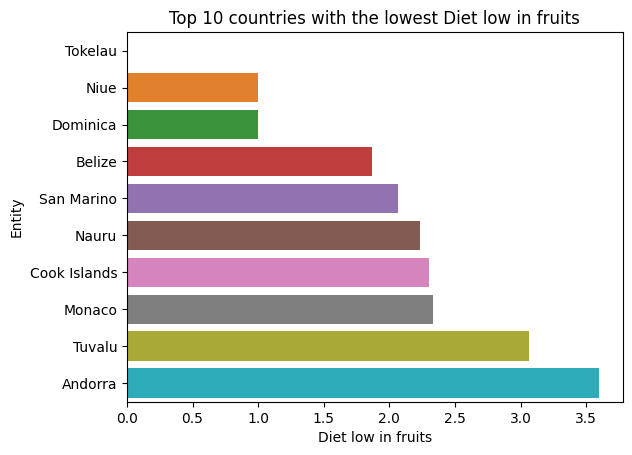

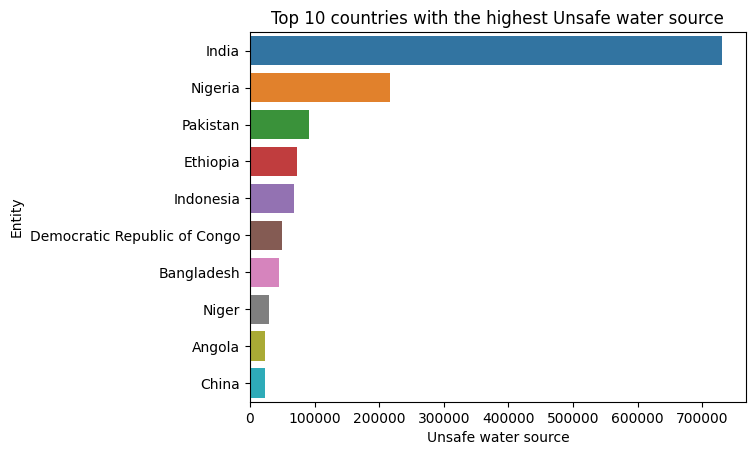

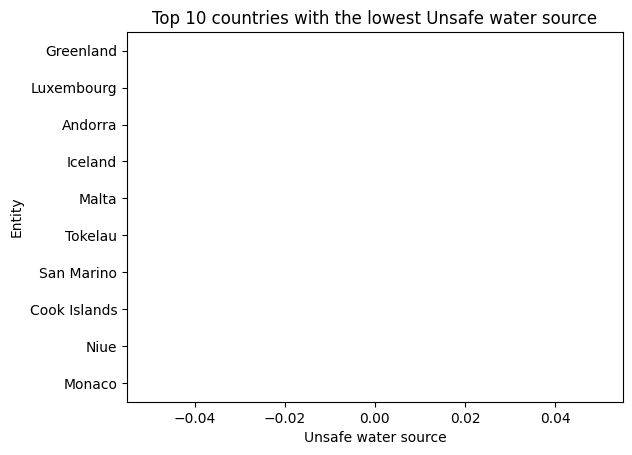

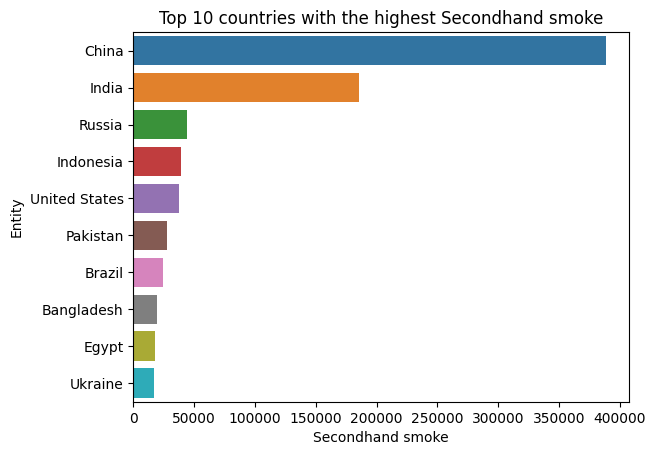

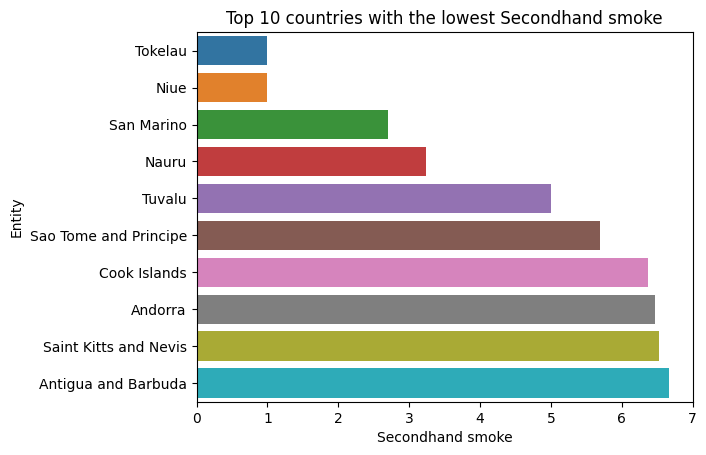

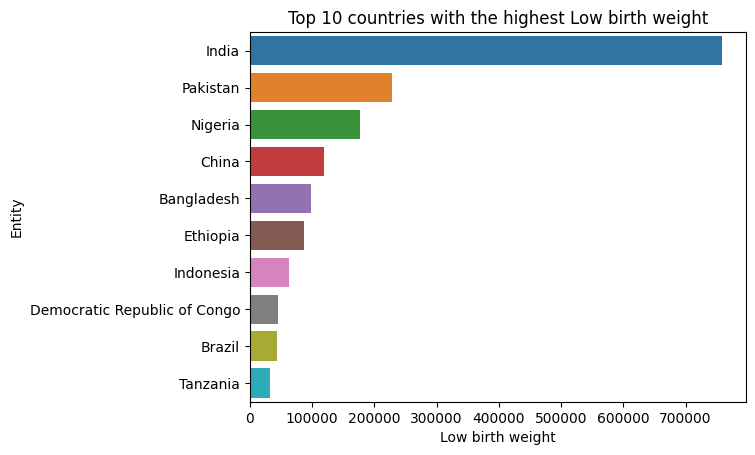

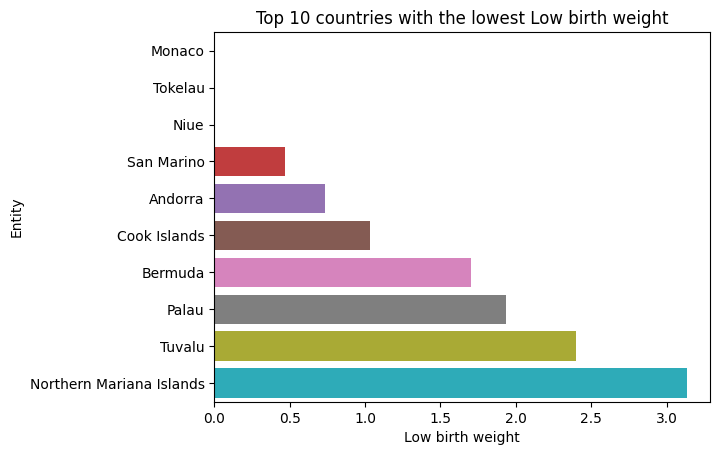

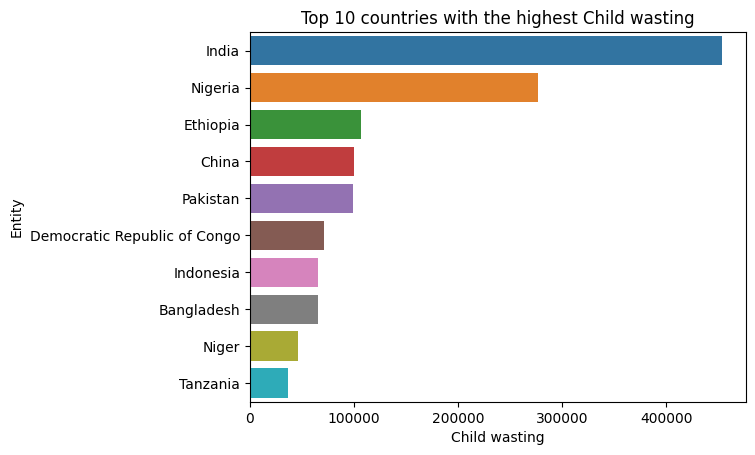

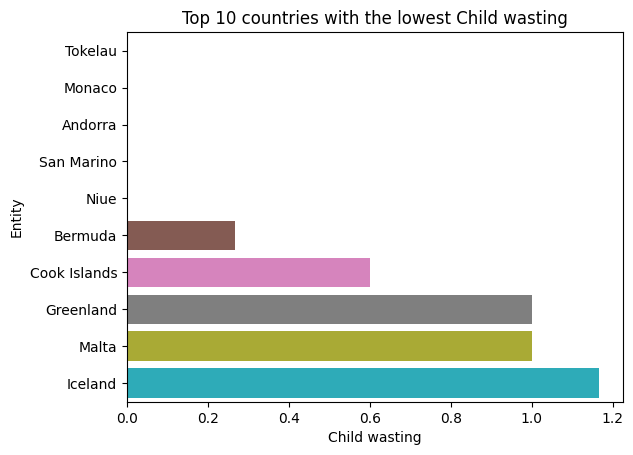

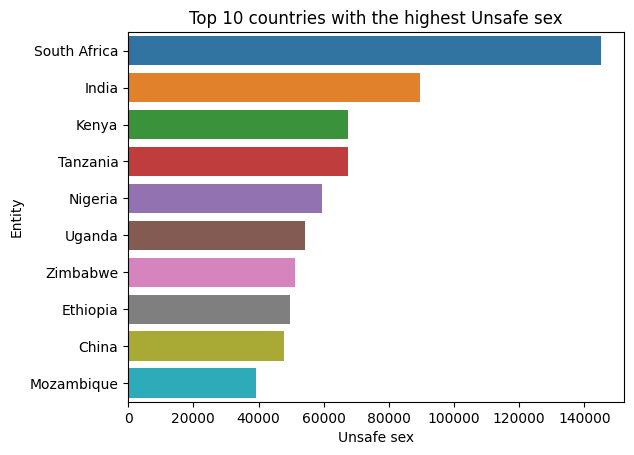

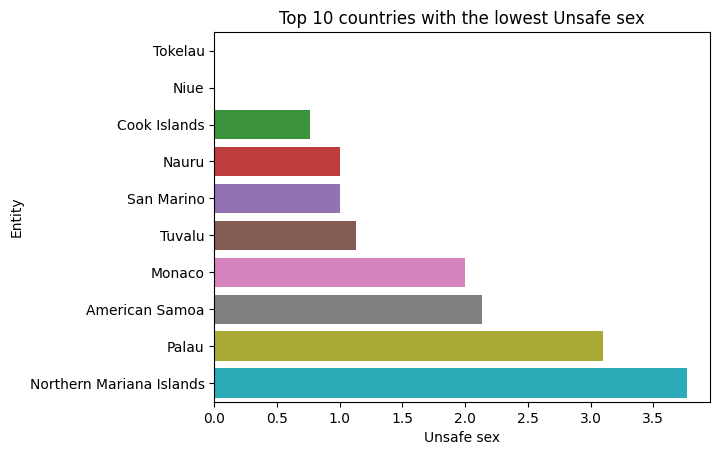

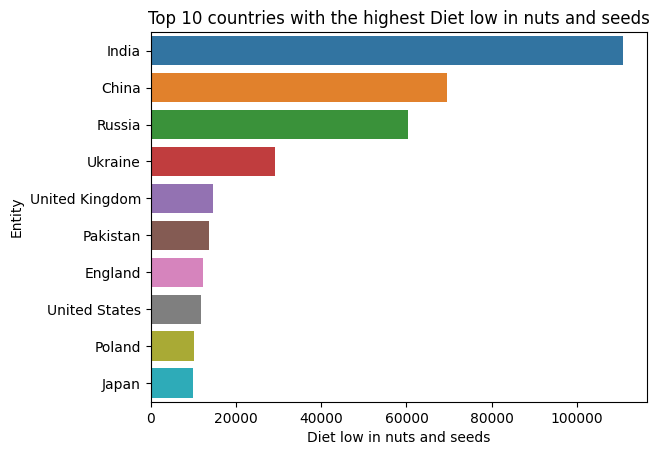

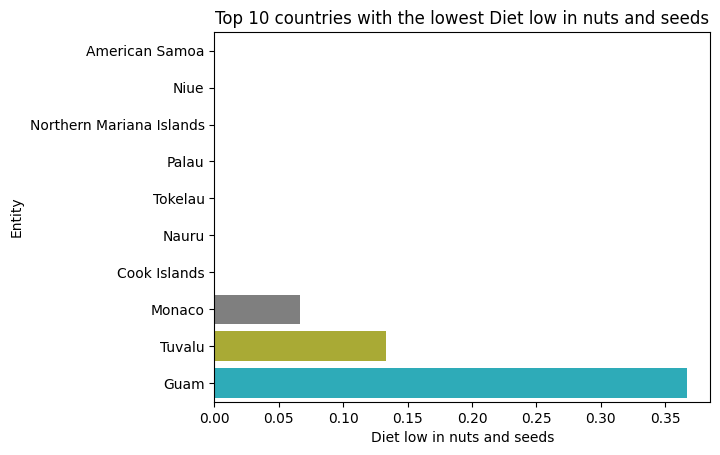

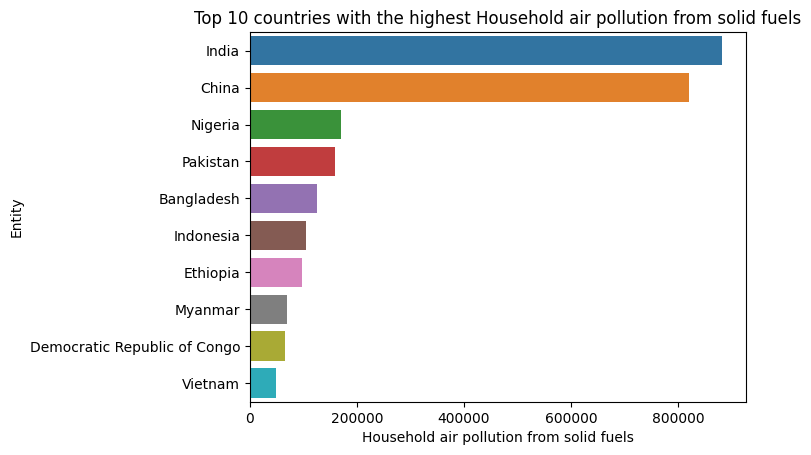

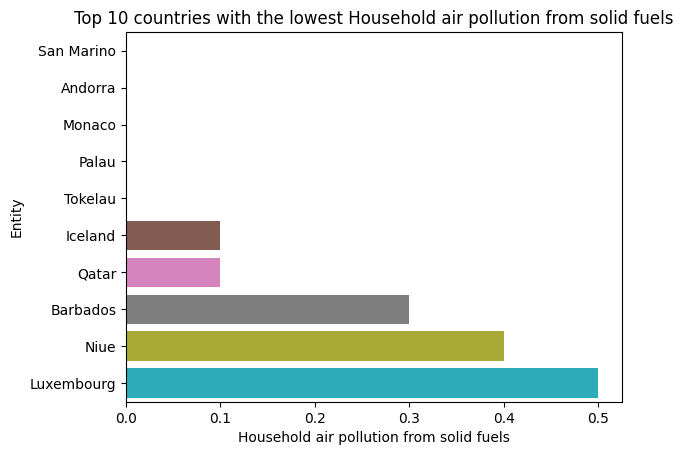

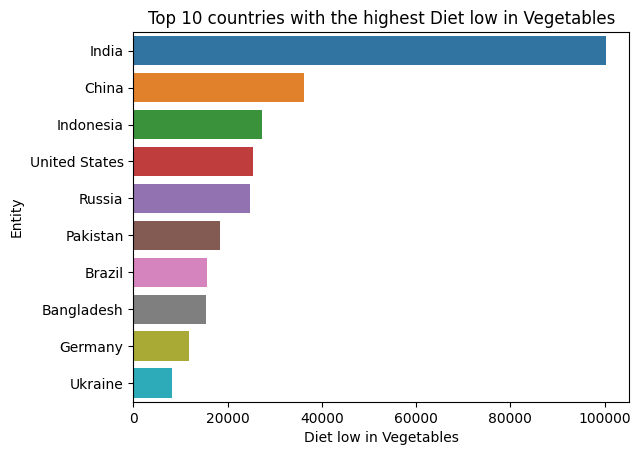

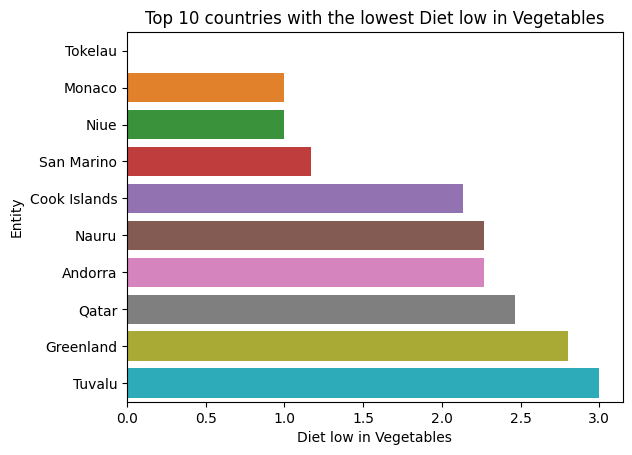

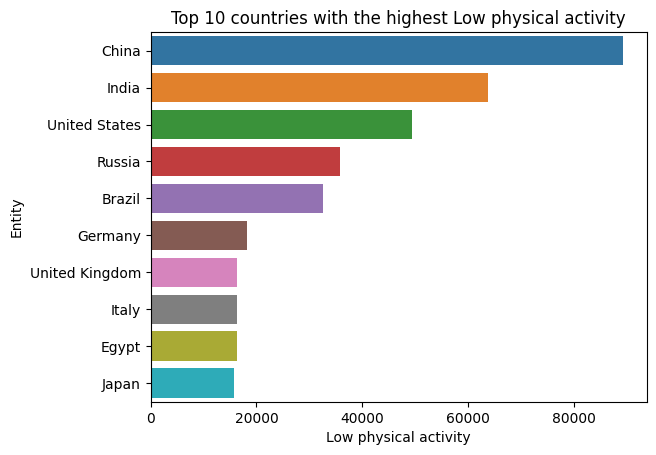

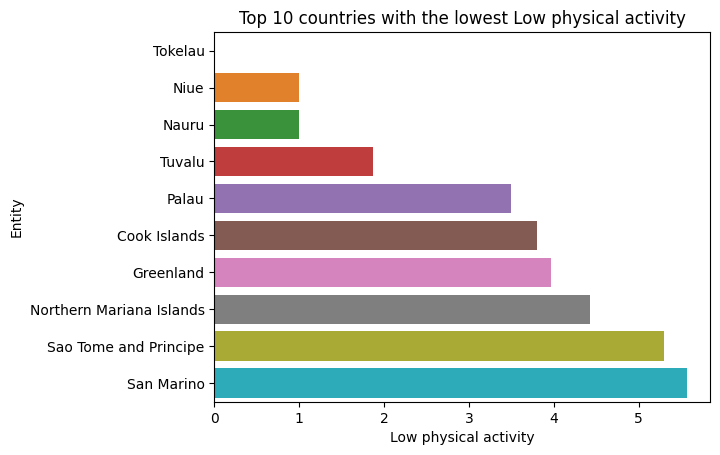

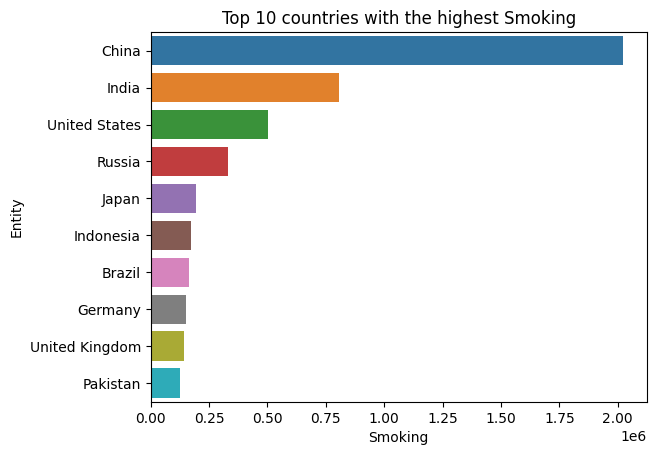

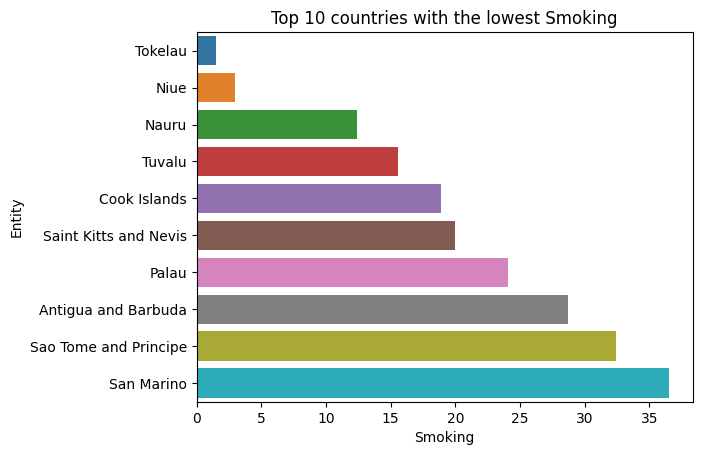

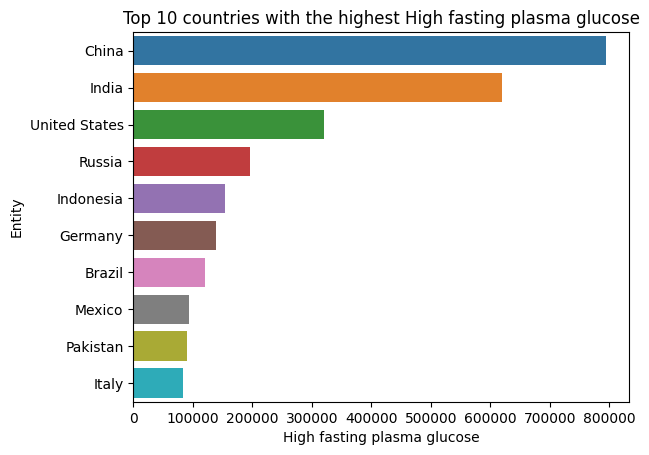

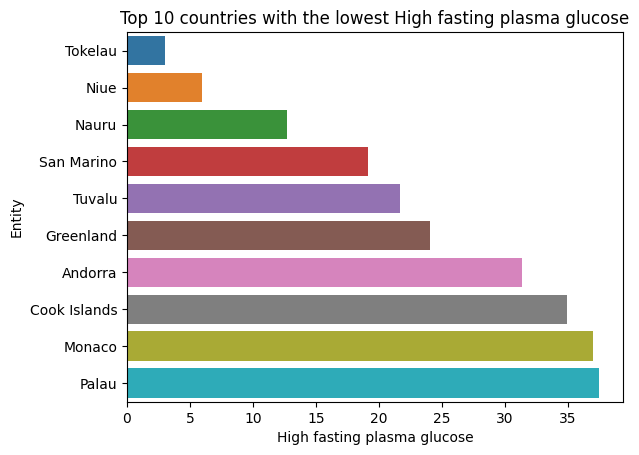

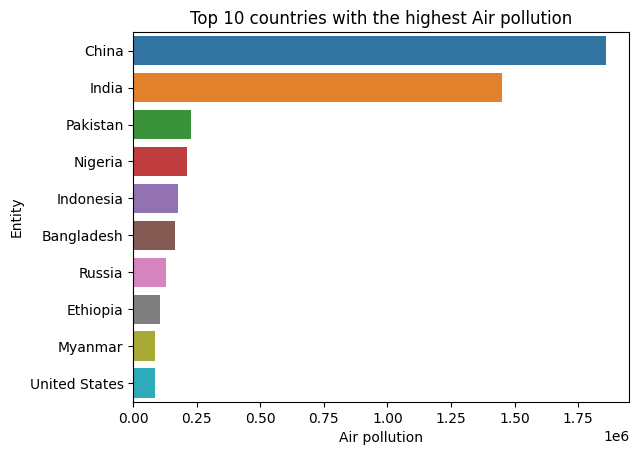

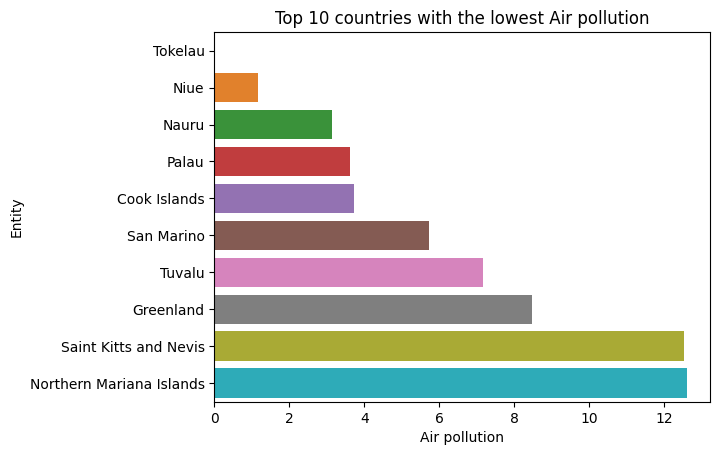

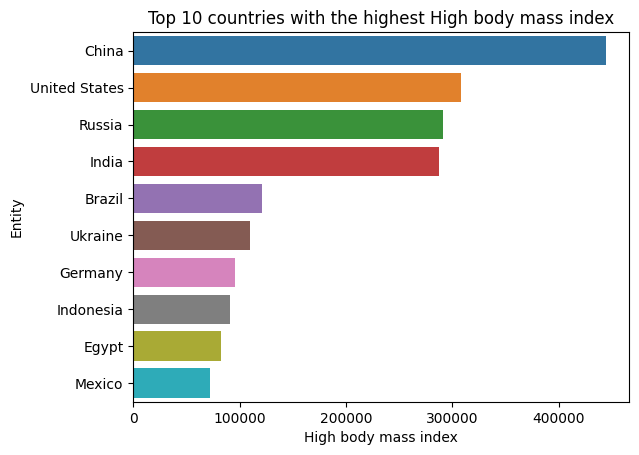

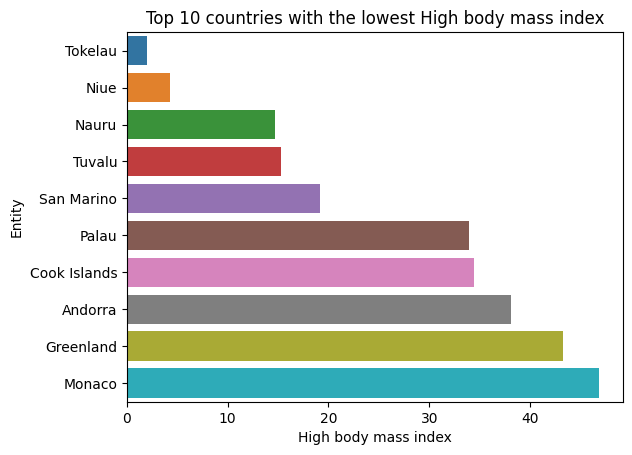

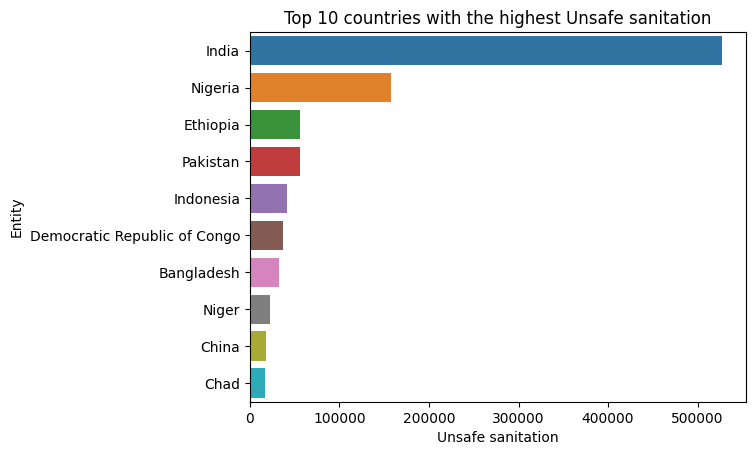

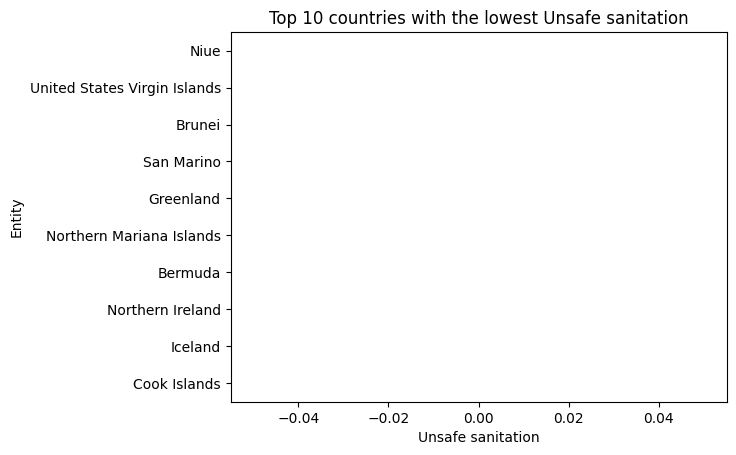

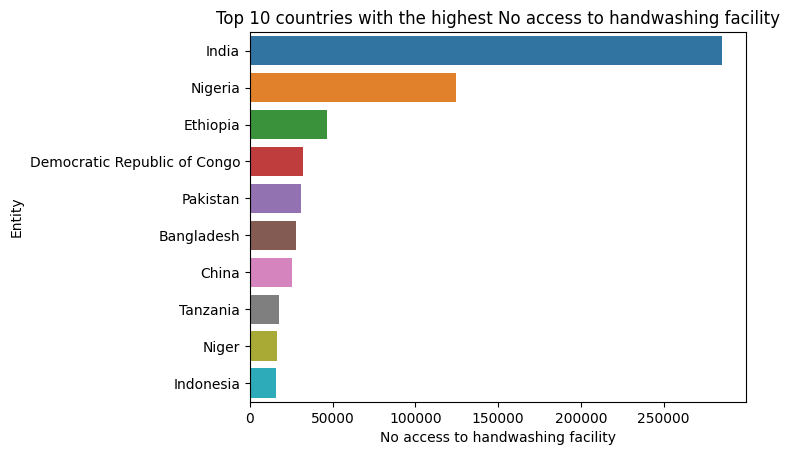

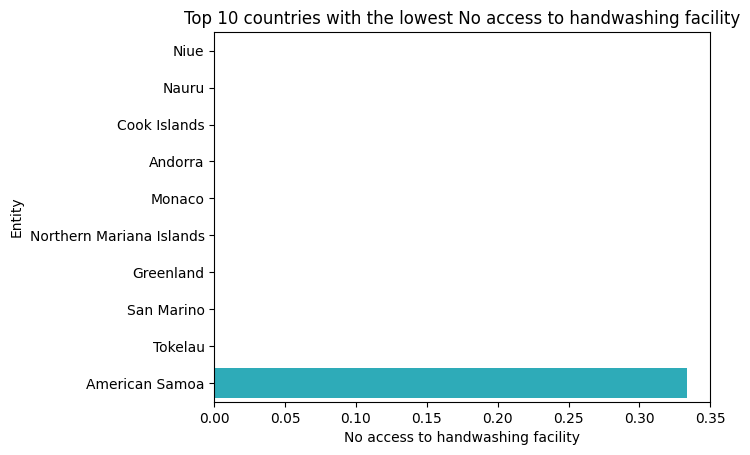

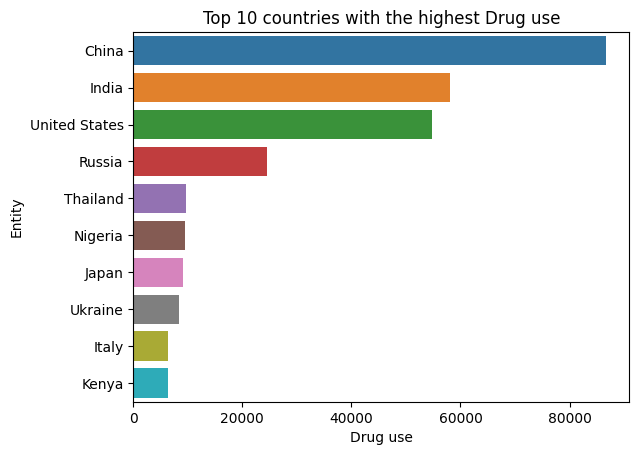

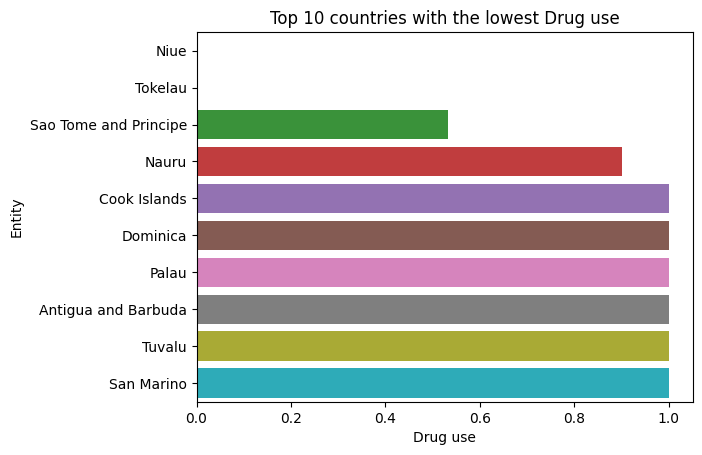

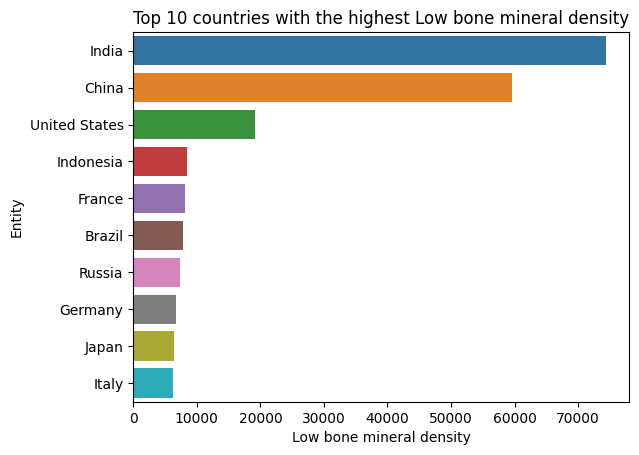

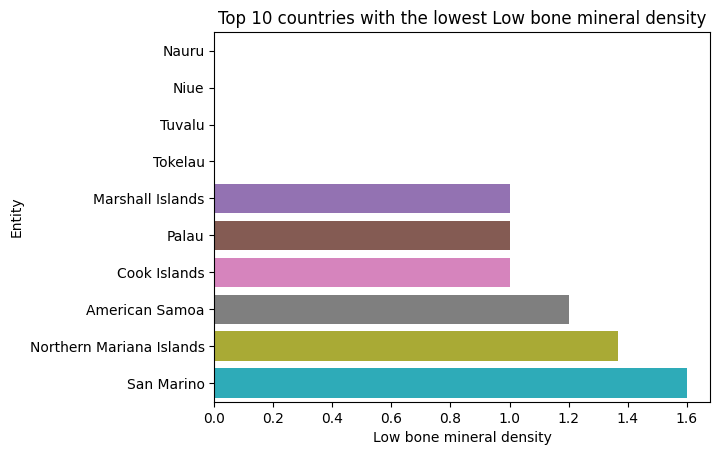

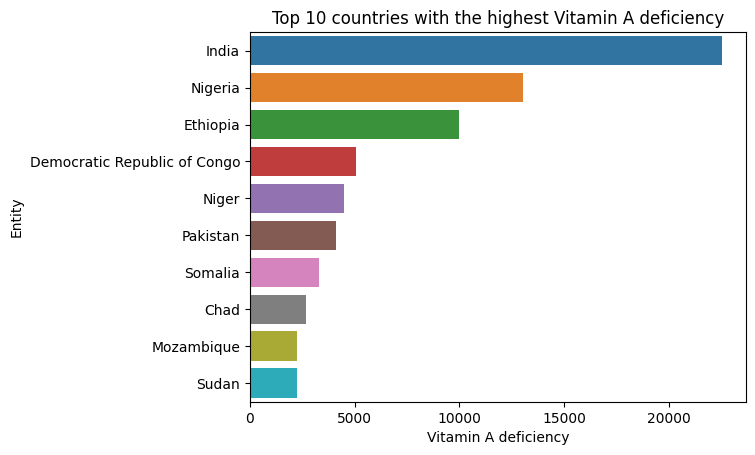

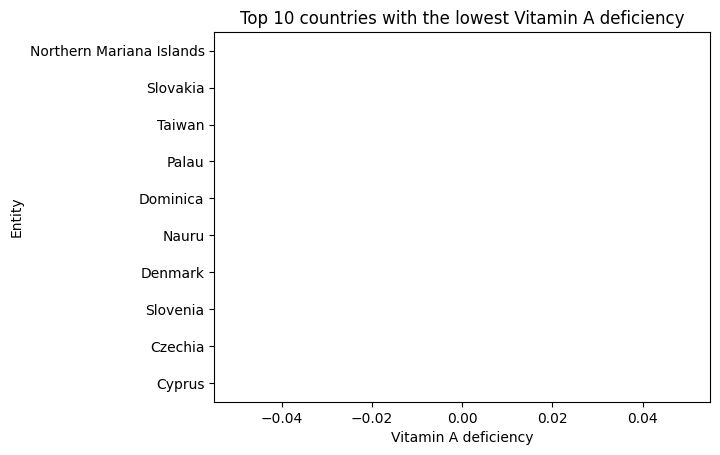

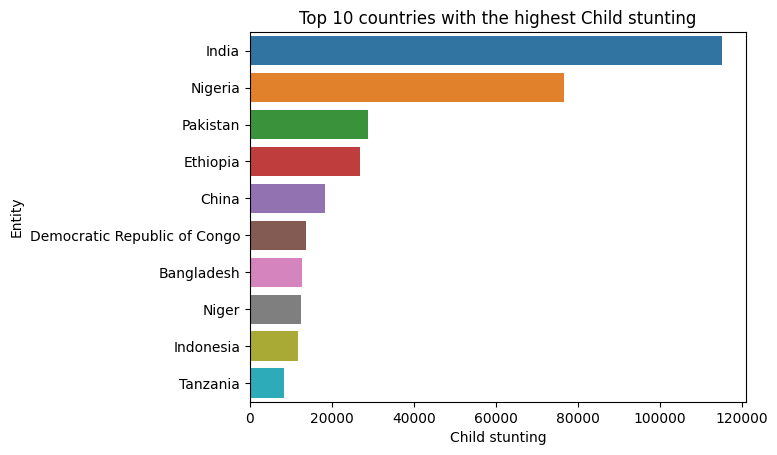

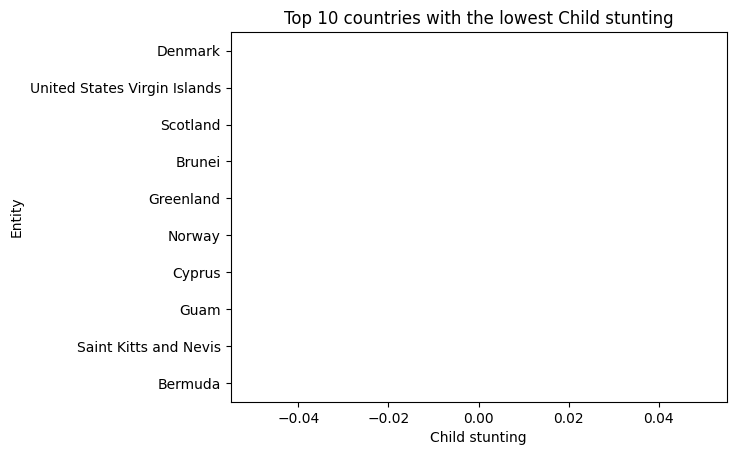

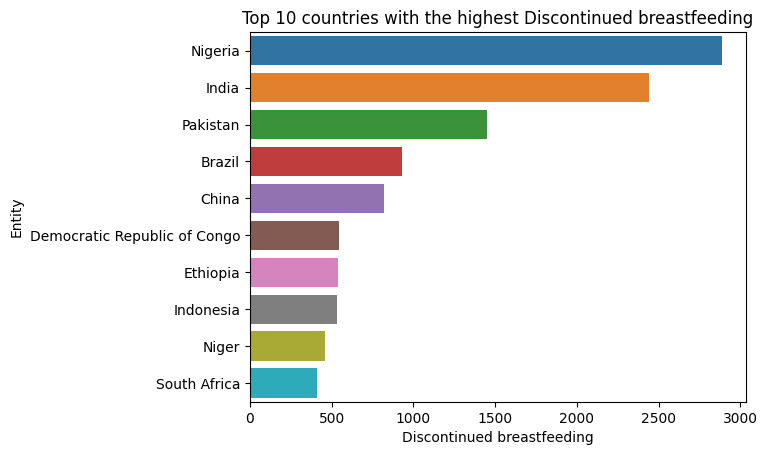

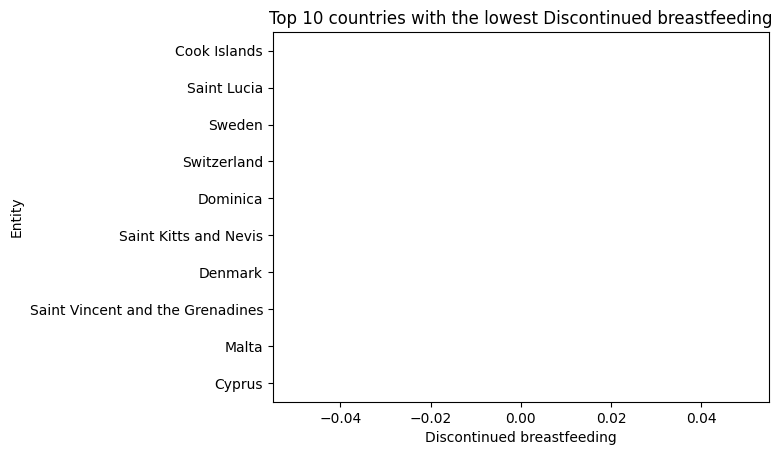

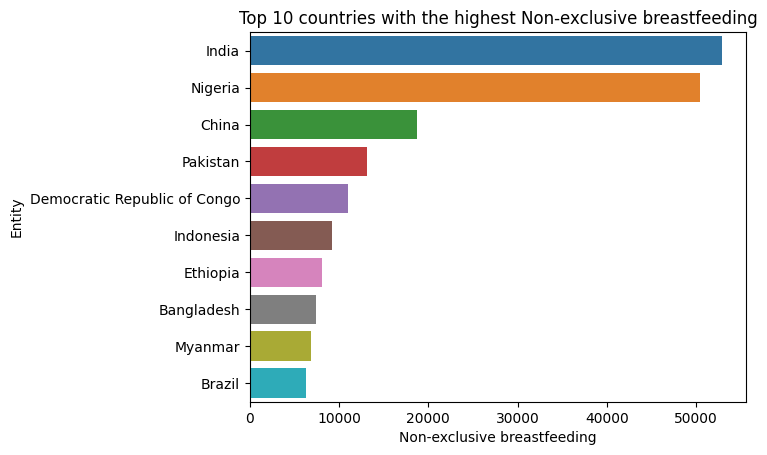

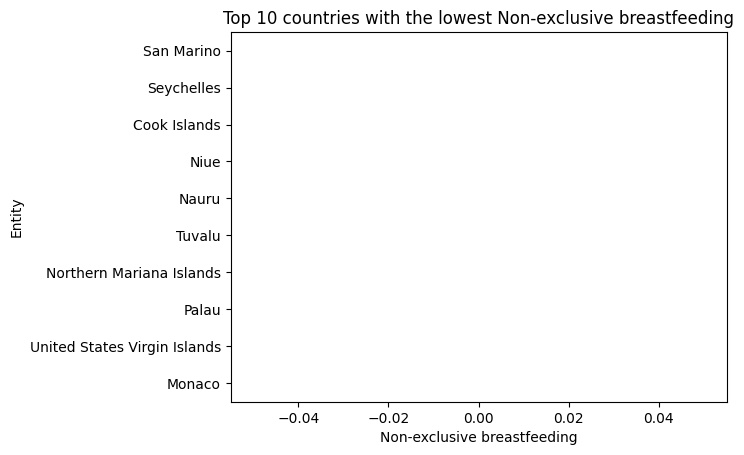

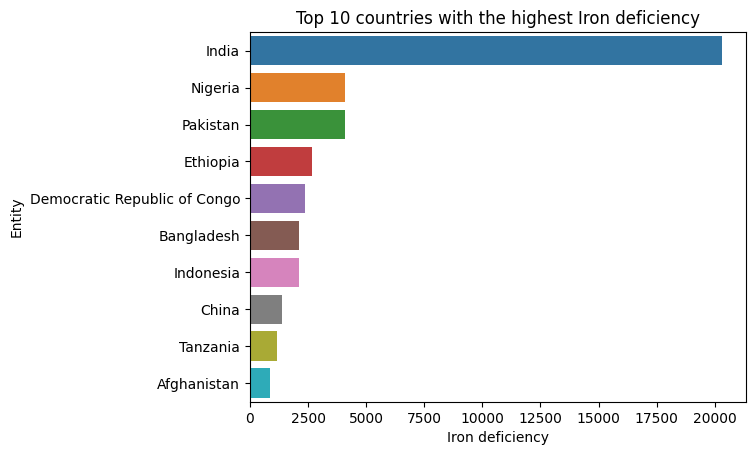

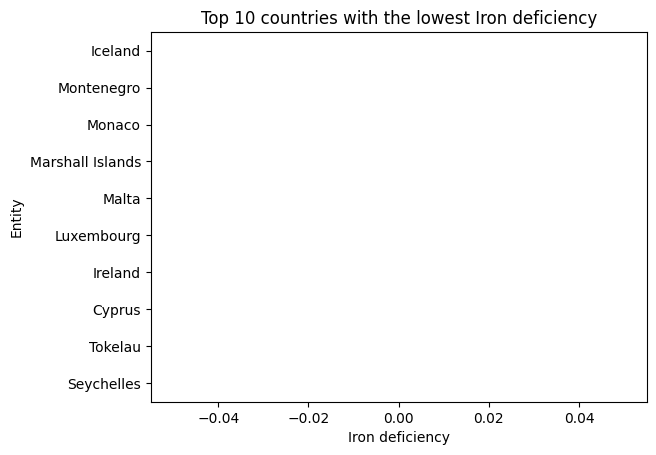

In [23]:
plt.figure(figsize=(20,5))
for i in deathRateData.iloc[:, 3:]:
    plt.figure(i)
    tmpStr = 'Top 10 countries with the highest ' + i
    plt.title(tmpStr)
    plotData(i, False)
    plt.figure(i * 100)
    tmpStr = 'Top 10 countries with the lowest ' + i
    plt.title(tmpStr)
    plotData(i, True)


Now plotting data by year

Reset the dataframe because we dropped some colums previously

In [24]:
deathRateData = pd.read_csv(filePath)

Clean year column, make it categorical 

In [25]:
deathRateData['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [26]:
deathRateData["Year"] = deathRateData["Year"].astype(str)

In [27]:
def plotYearData(toPlot, type):
    tmp = deathRateData.groupby('Year')[toPlot].mean().reset_index()
    tmp = tmp.sort_values(by=toPlot, ascending=type)
    sns.barplot(y='Year', x=toPlot, data=tmp.head(10))

/tmp/ipykernel_3229/4225988293.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


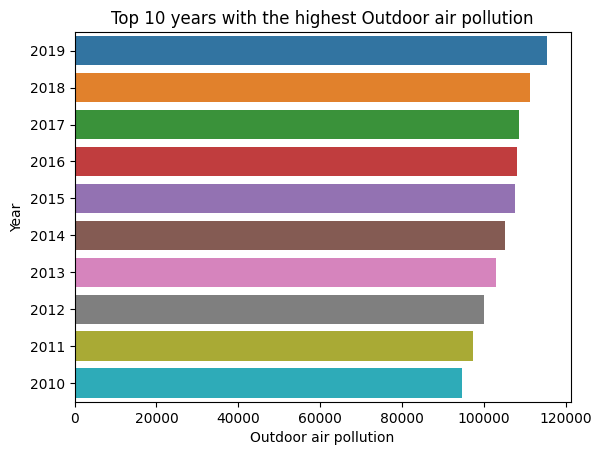

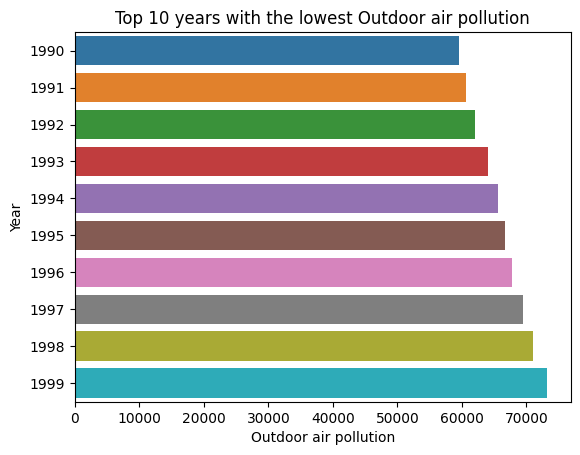

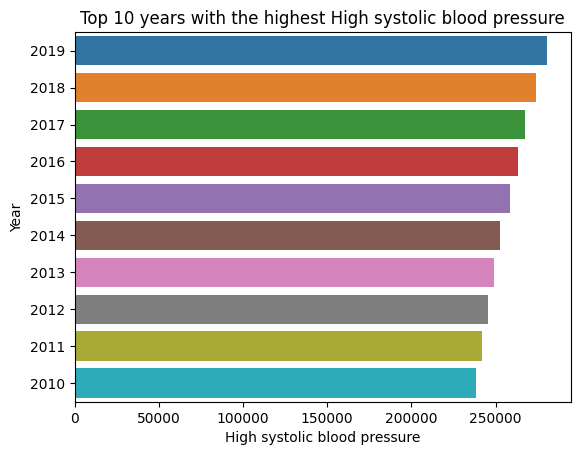

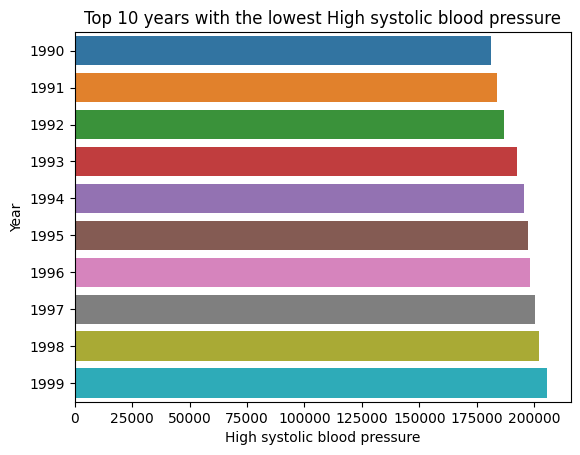

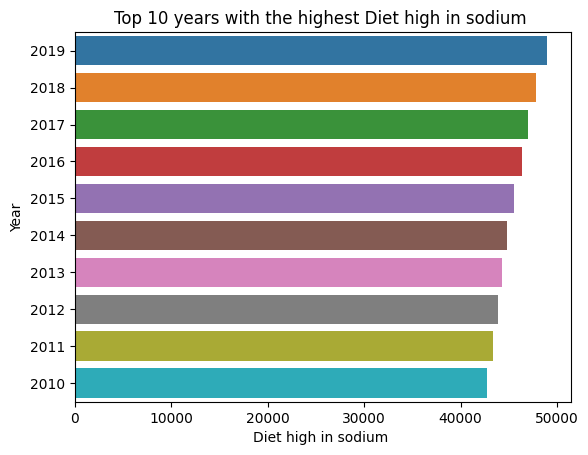

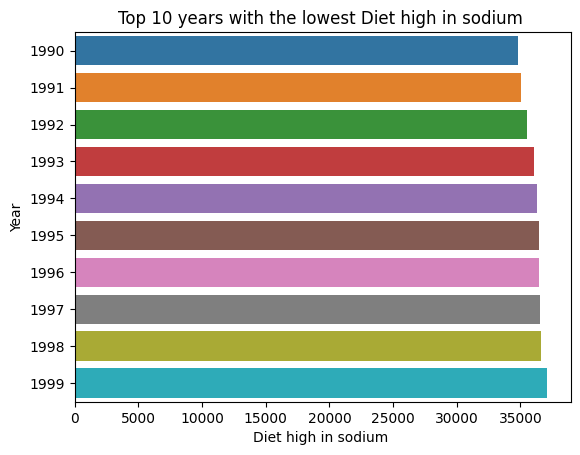

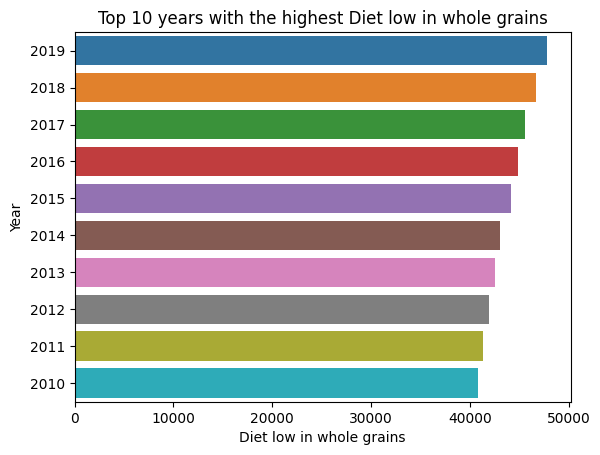

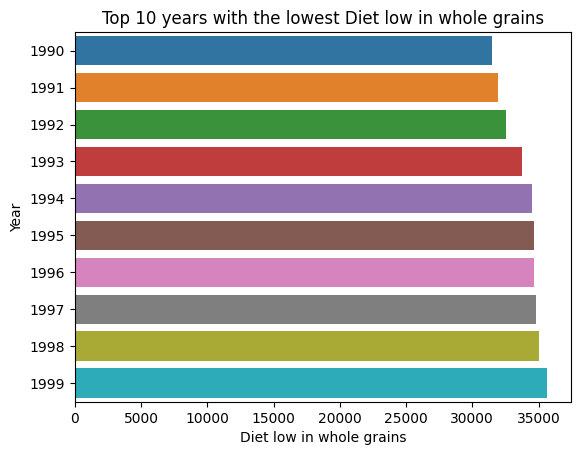

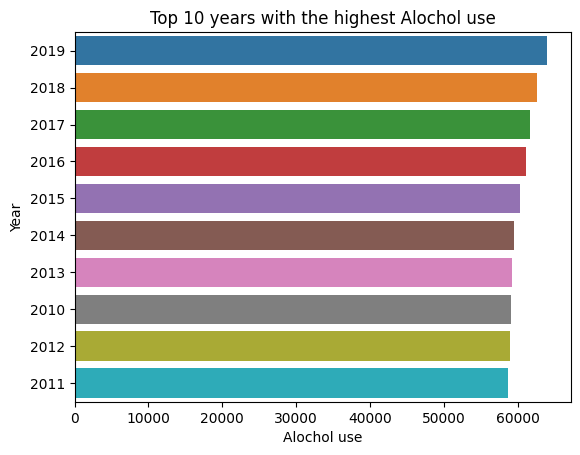

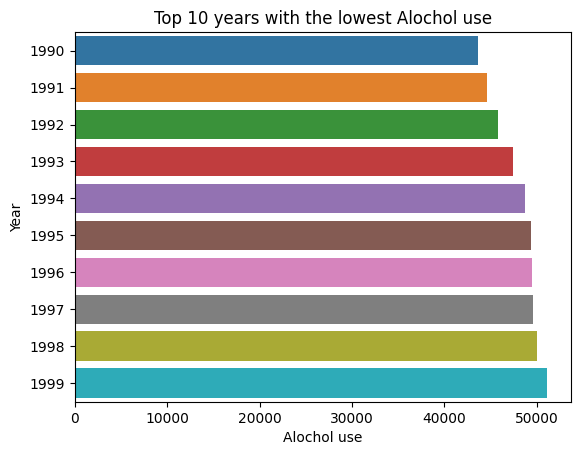

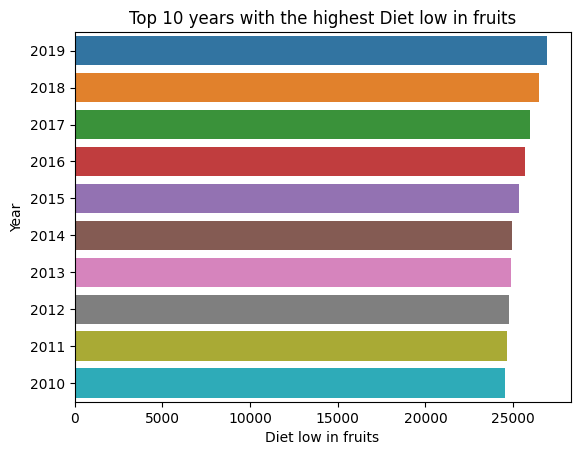

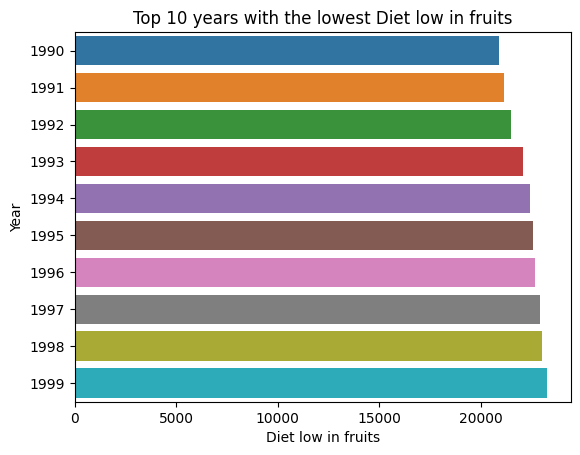

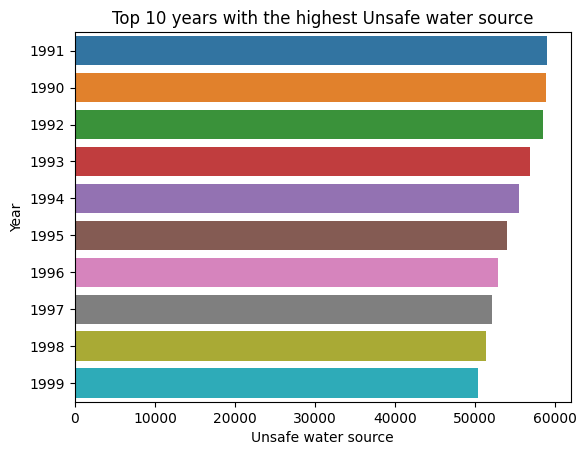

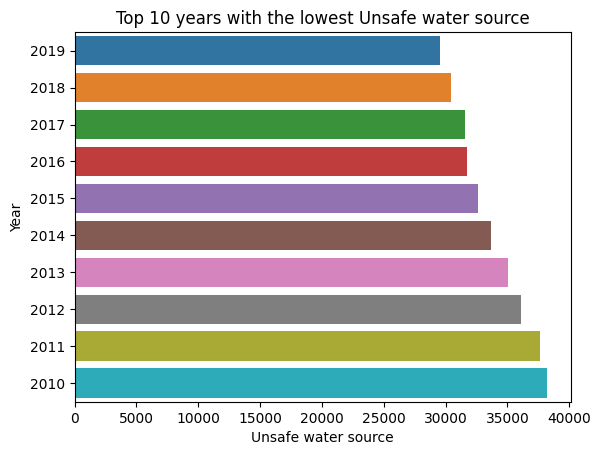

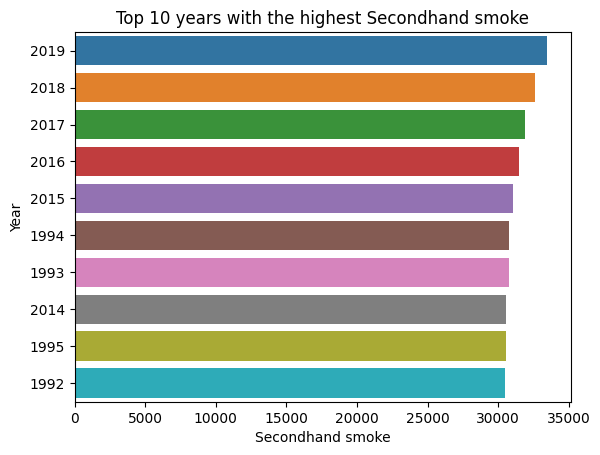

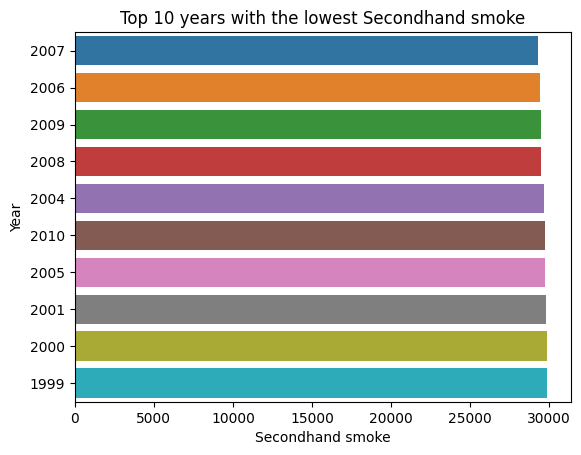

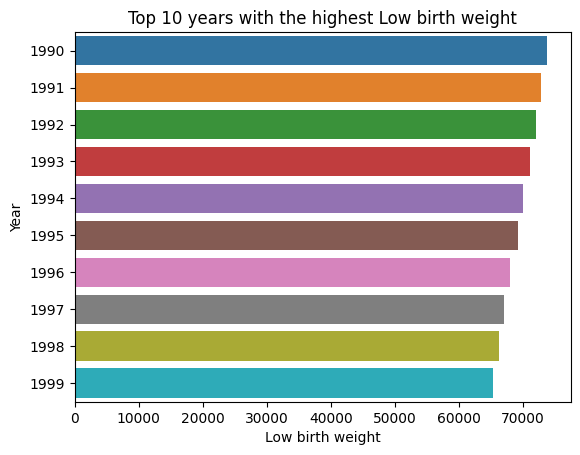

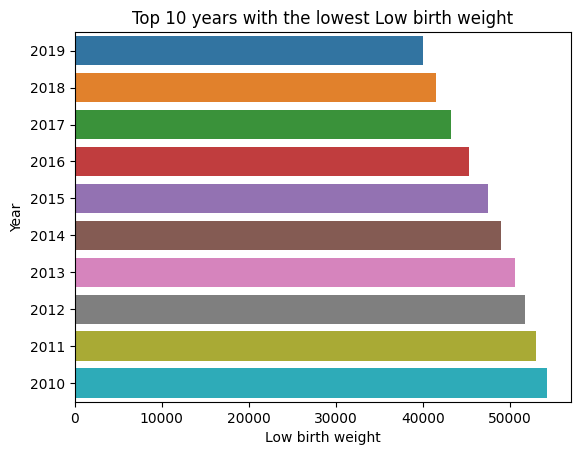

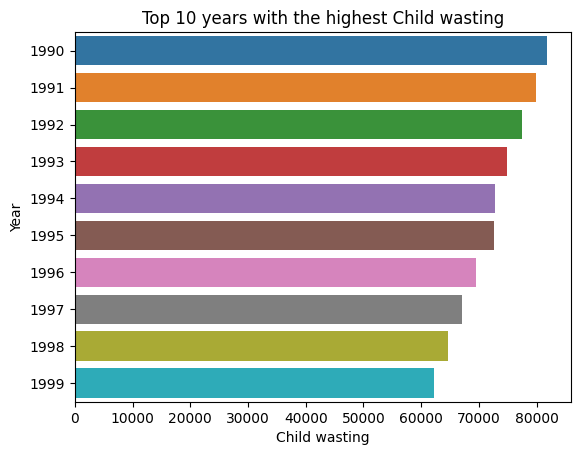

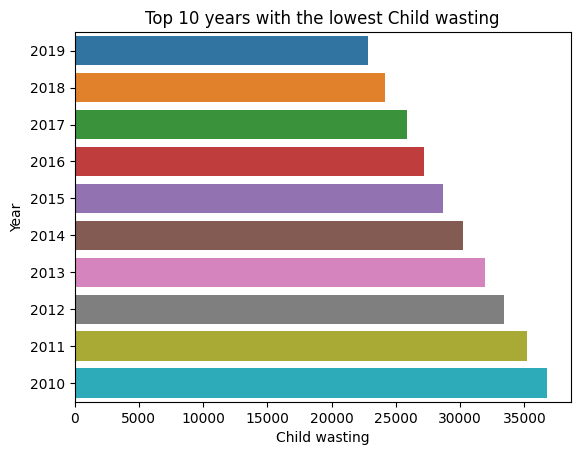

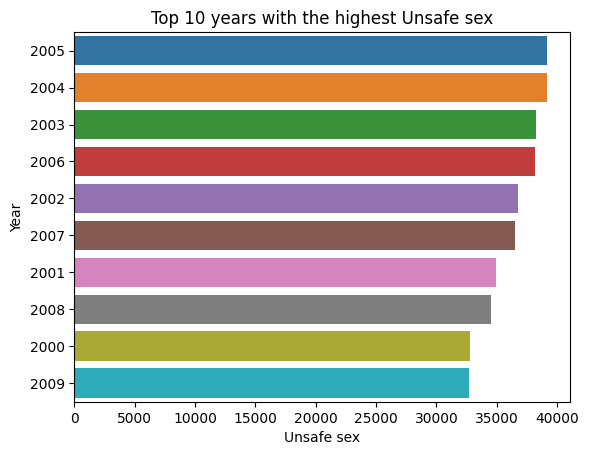

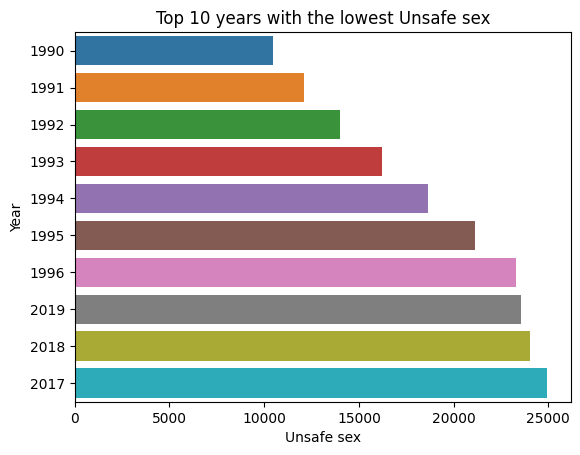

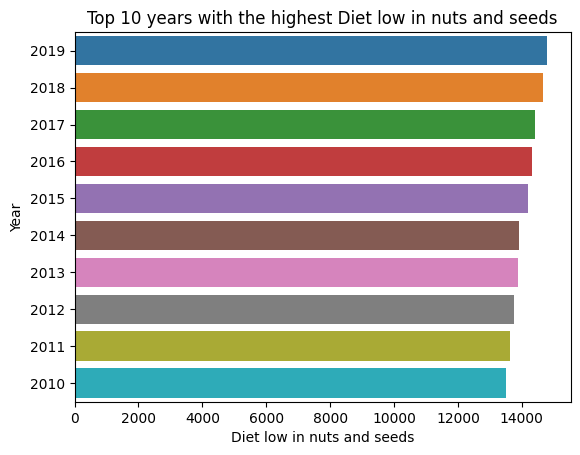

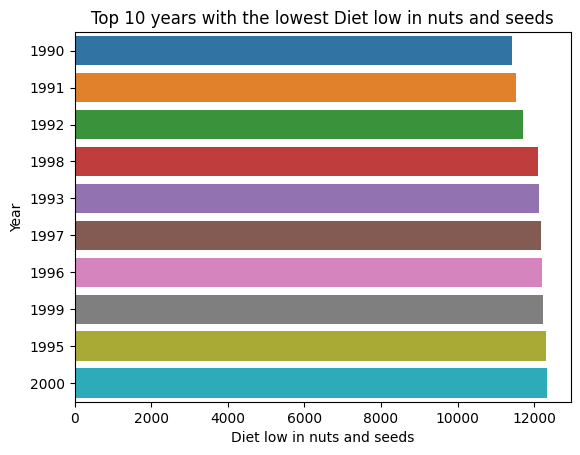

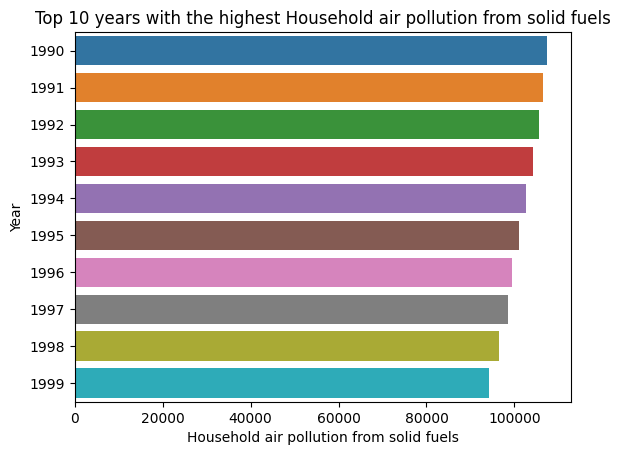

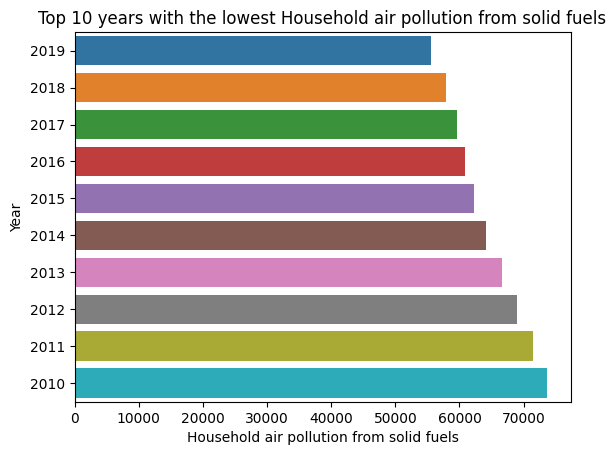

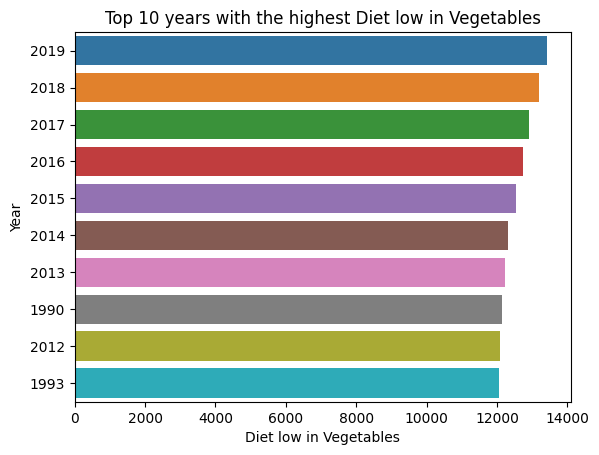

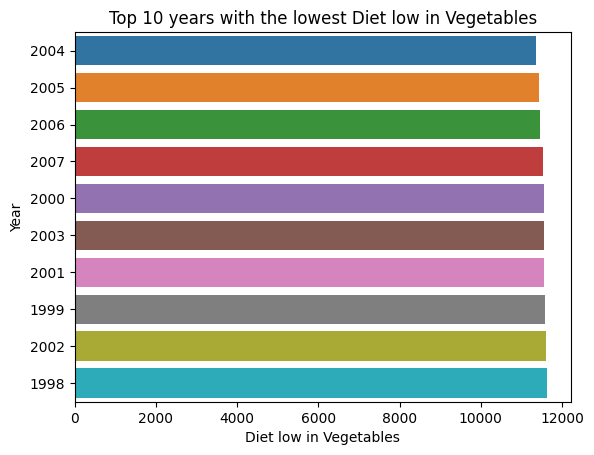

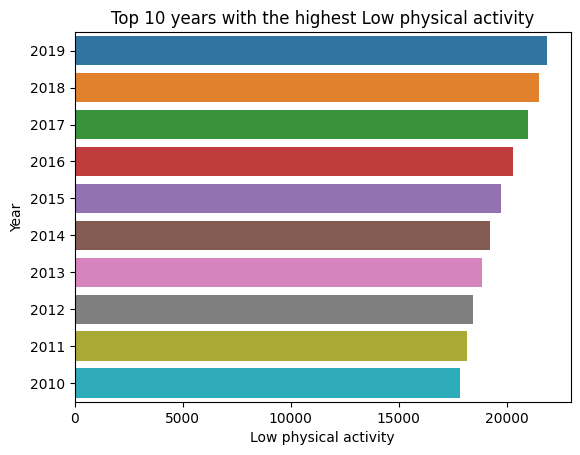

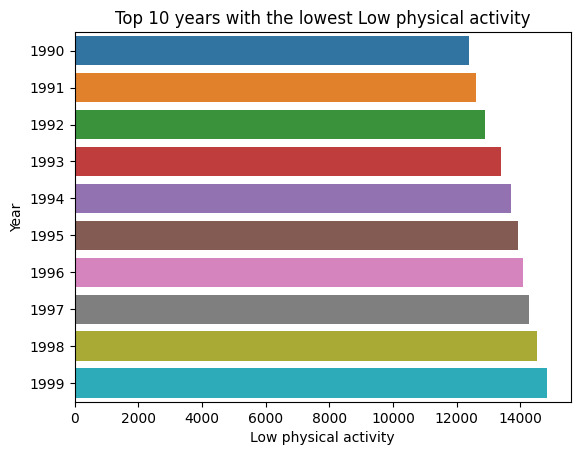

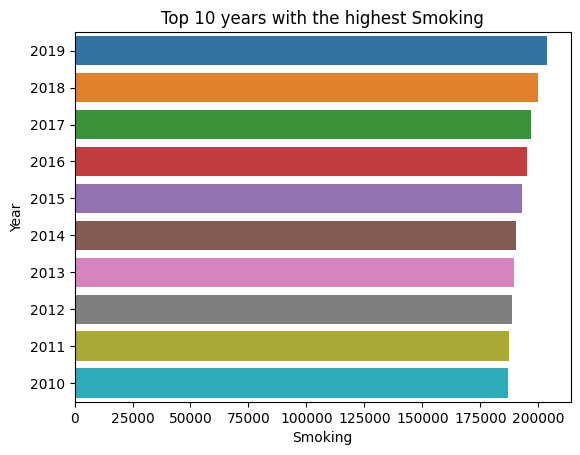

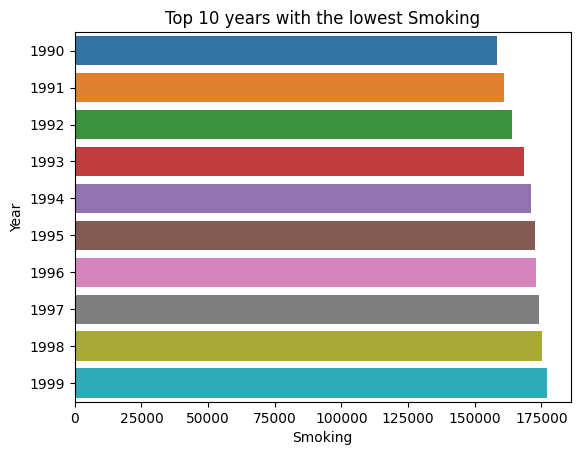

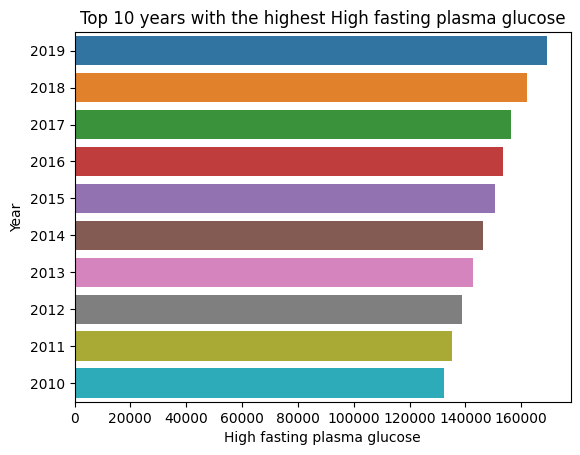

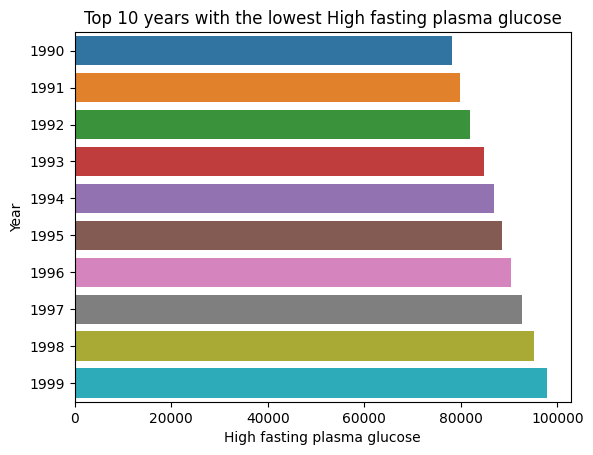

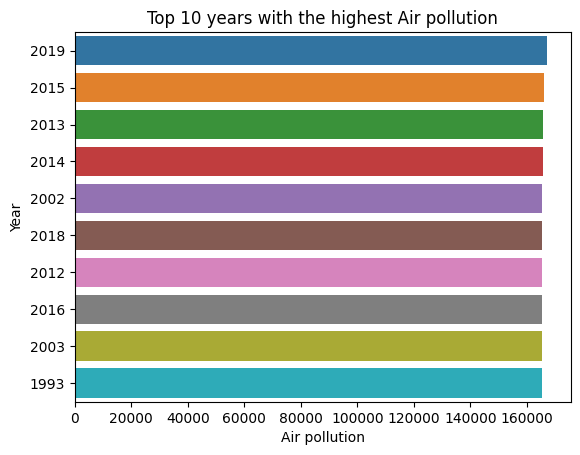

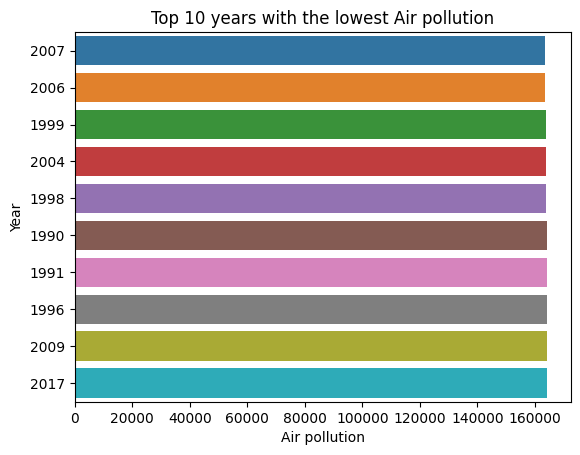

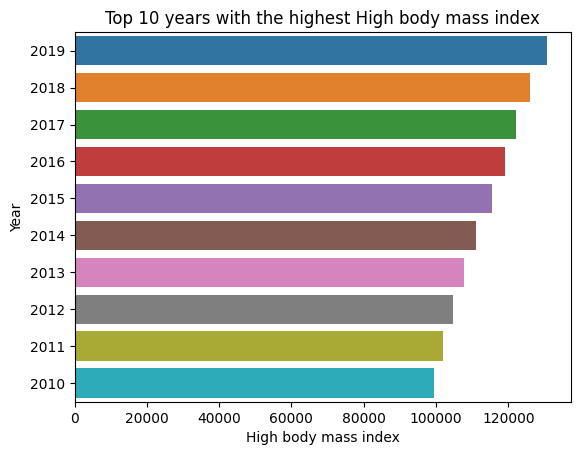

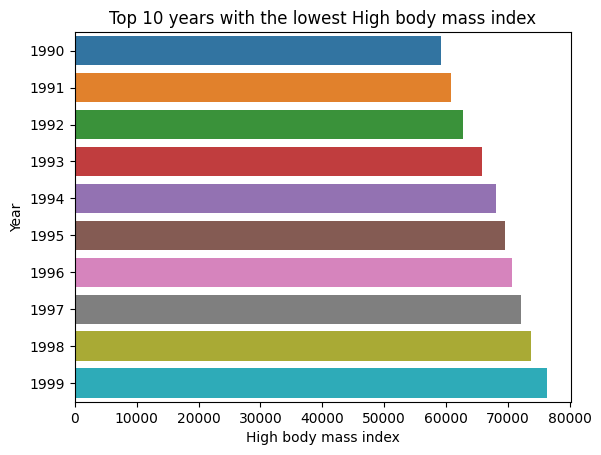

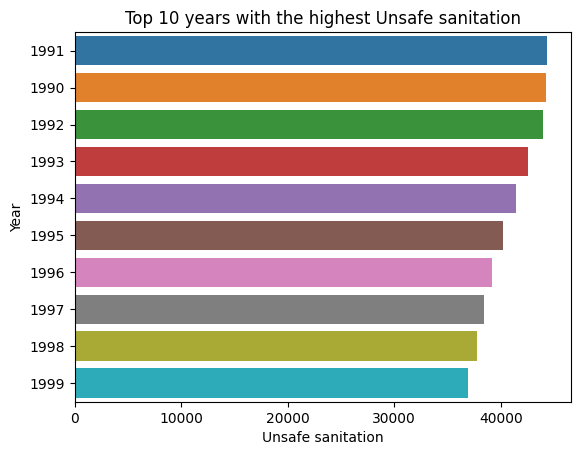

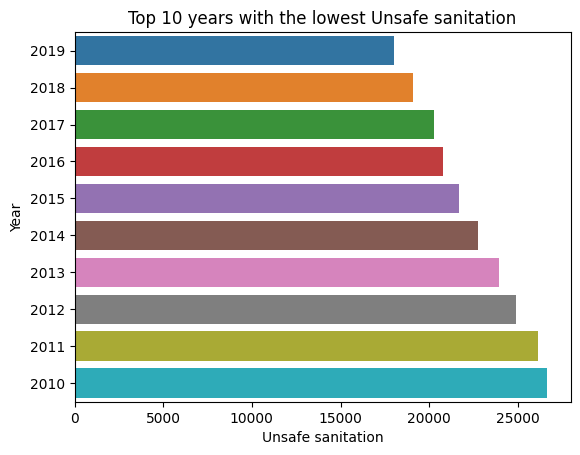

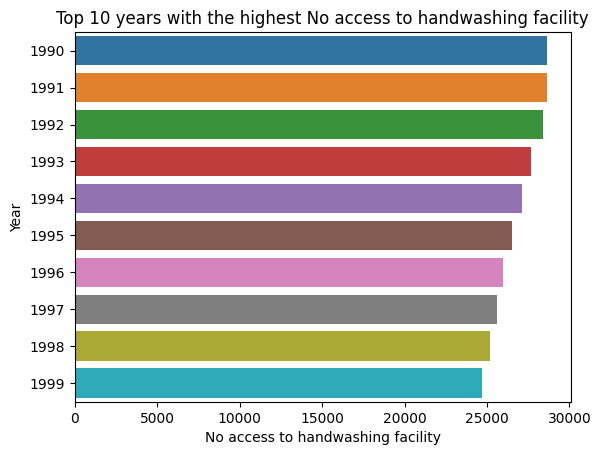

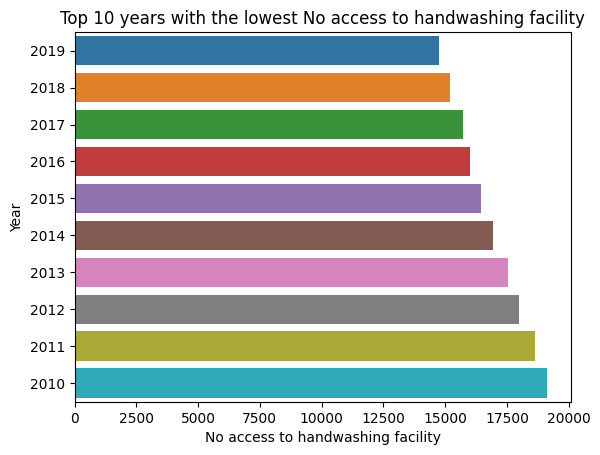

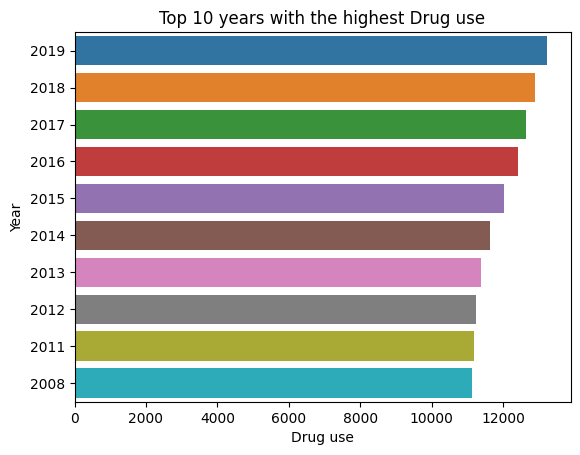

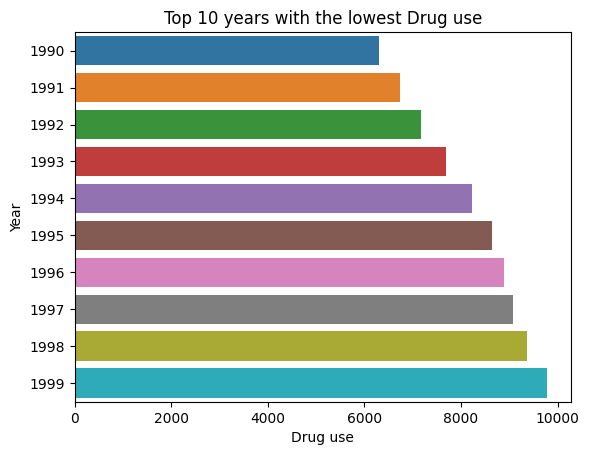

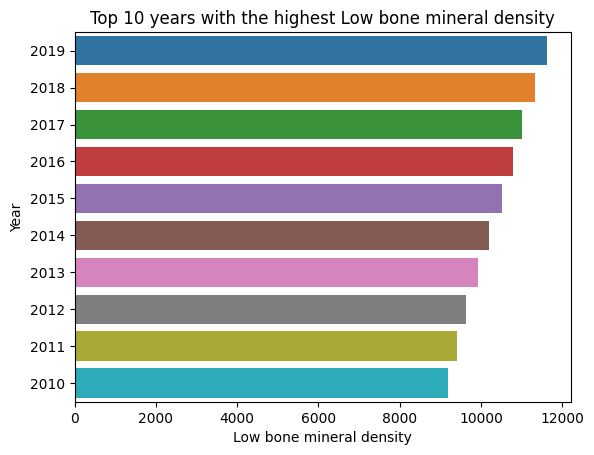

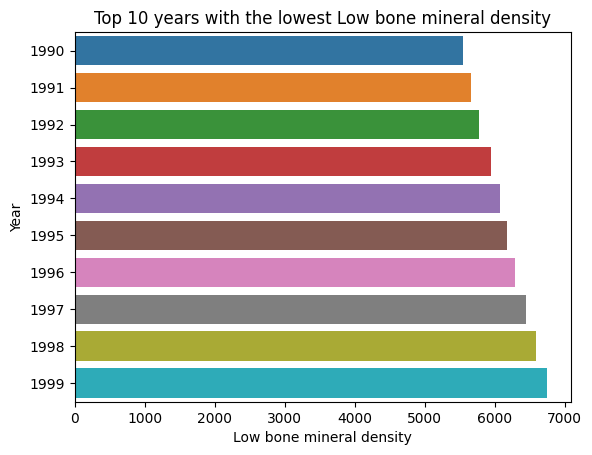

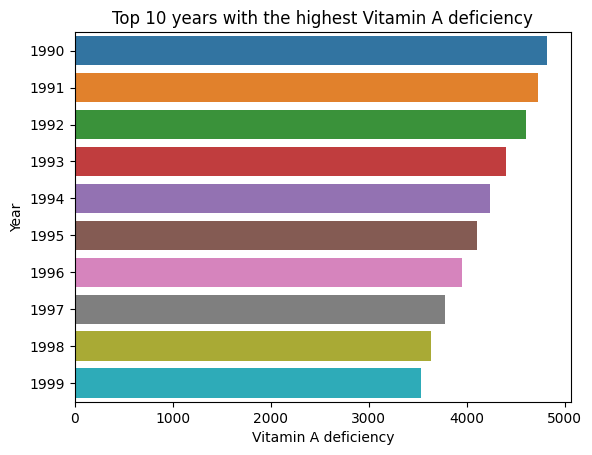

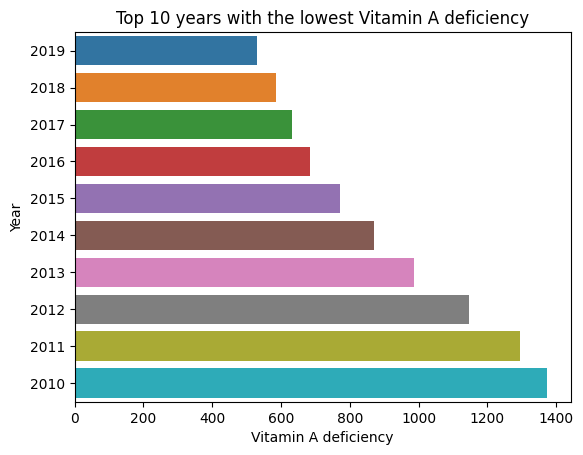

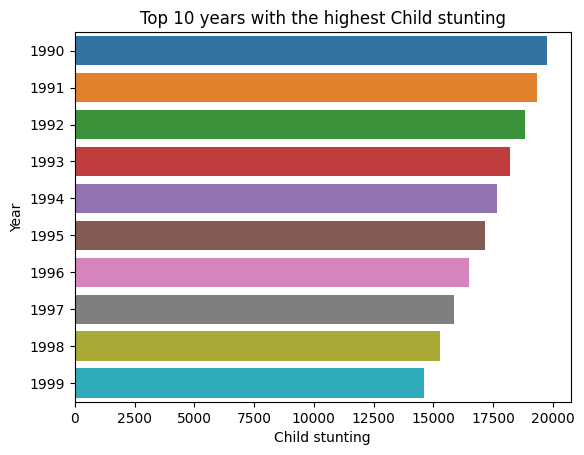

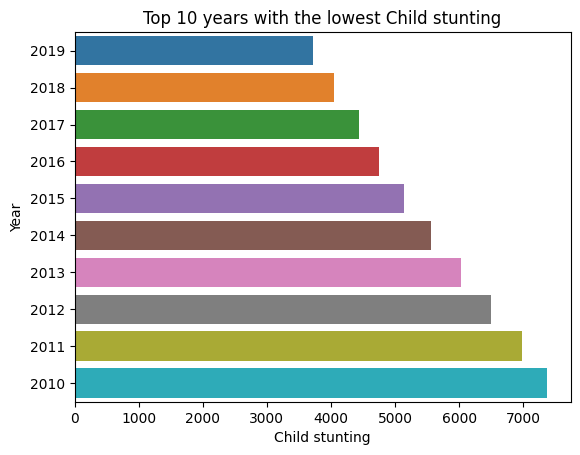

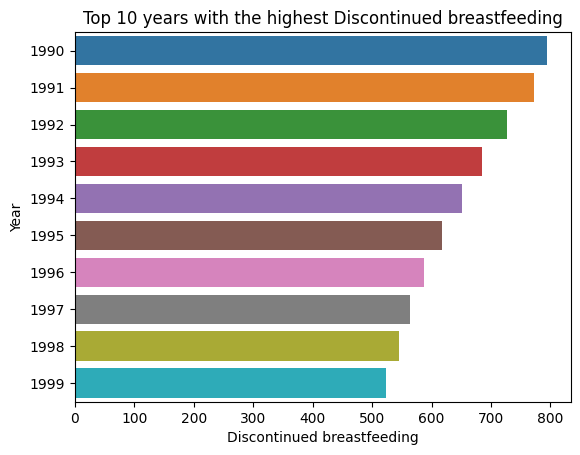

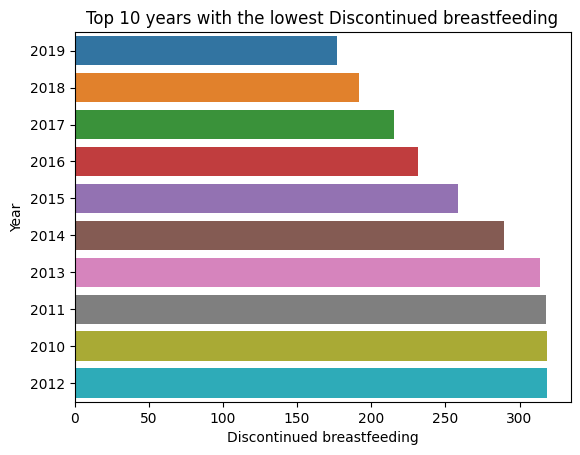

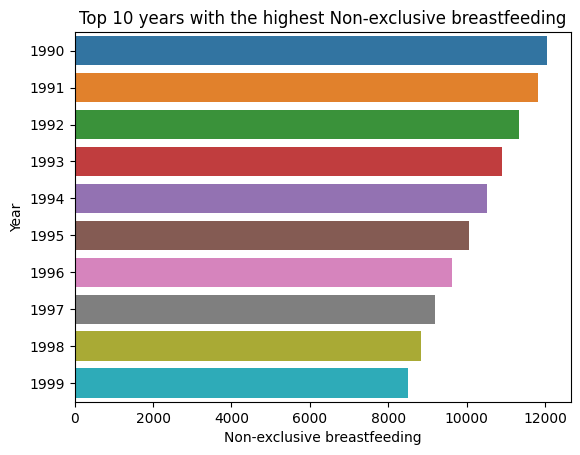

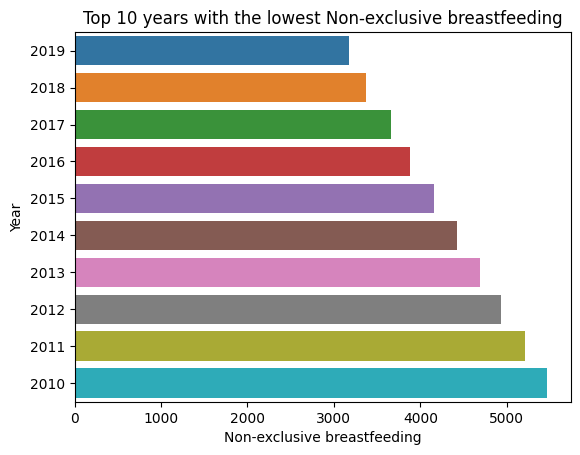

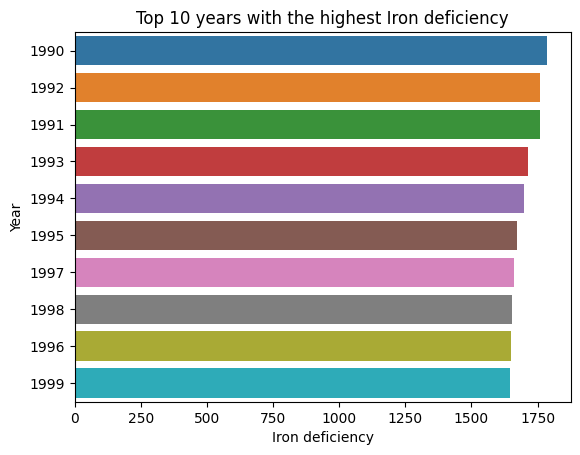

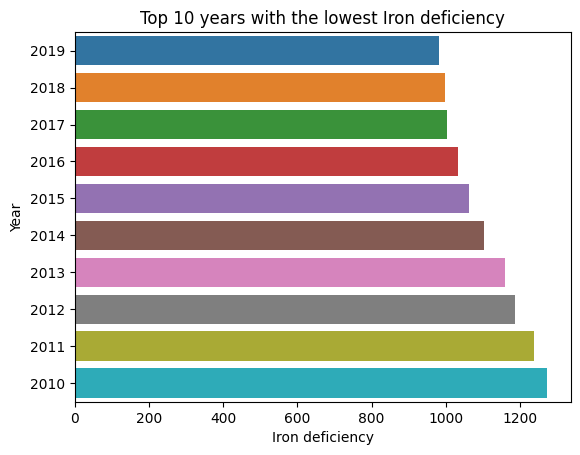

In [29]:
for i in deathRateData.iloc[:, 3:]:
    plt.figure(i)
    tmpStr = 'Top 10 years with the highest ' + i
    plt.title(tmpStr)
    plotYearData(i, False)
    plt.figure(i * 100)
    tmpStr = 'Top 10 years with the lowest ' + i
    plt.title(tmpStr)
    plotYearData(i, True)